In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.0003289218016943769


In [3]:
import sys
sys.path.append('../../')
from lib_grover import *

In [4]:
#setting the number of shots and Grover operators.
max_iter = 100
nbit = 10
shots = 8192
# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [5 * i for i in range(20)]
shots_list = [shots] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception('The length of shots_list should be equal to the length of number_grover_list.')

In [5]:
with open("pkls/raw_hit_list_list.pkl", "rb") as f:
    raw_hit_list_list = pickle.load(f)
with open("pkls/lnp_hit_list_list.pkl", "rb") as f:
    lnp_hit_list_list = pickle.load(f)
with open("pkls/s_lm0_hit_list_list.pkl", "rb") as f:
    s_lm0_hit_list_list = pickle.load(f)
with open("pkls/mooney01_hit_list_list.pkl", "rb") as f:
    mooney01_hit_list_list = pickle.load(f)
with open("pkls/mooney001_hit_list_list.pkl", "rb") as f:
    mooney001_hit_list_list = pickle.load(f)
with open("pkls/nation_hit_list_list.pkl", "rb") as f:
    nation_hit_list_list = pickle.load(f)

In [6]:
with open("pkls/lnp_time_list_list.pkl", "rb") as f:
    lnp_time_list_list = pickle.load(f)
with open("pkls/s_lm0_time_list_list.pkl", "rb") as f:
    s_lm0_time_list_list = pickle.load(f)
with open("pkls/mooney01_time_list_list.pkl", "rb") as f:
    mooney01_time_list_list = pickle.load(f)
with open("pkls/mooney001_time_list_list.pkl", "rb") as f:
    mooney001_time_list_list = pickle.load(f)
with open("pkls/nation_time_list_list.pkl", "rb") as f:
    nation_time_list_list = pickle.load(f)

Text(0, 0.5, 'number of shots for $|00...0>$')

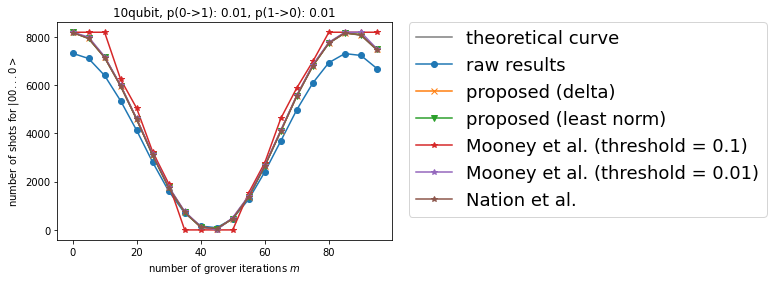

In [7]:
divide = len(number_grover_list)
# number_grover_list = [10 * i for i in range(10)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         8192 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C7")
plt.plot(number_grover_list, raw_hit_list_list[-1], marker="o", label="raw results", color="C0")
plt.plot(number_grover_list, s_lm0_hit_list_list[-1], marker="x", label="proposed (delta)", color="C1")
plt.plot(number_grover_list, lnp_hit_list_list[-1], marker="v", label="proposed (least norm)", color="C2")
plt.plot(number_grover_list, mooney01_hit_list_list[-1], marker="*", label="Mooney et al. (threshold = 0.1)", color="C3")
plt.plot(number_grover_list, mooney001_hit_list_list[-1], marker="*", label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(number_grover_list, np.asarray(nation_hit_list_list[-1]) * shots, marker="*", label="Nation et al.", color="C5")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("10qubit, p(0->1): 0.01, p(1->0): 0.01")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

In [14]:
thetaCandidate_raw_list_list = []
thetaCandidate_lnp_list_list = []
thetaCandidate_s_lm0_list_list = []
thetaCandidate_mooney001_list_list = []
thetaCandidate_mooney01_list_list = []
thetaCandidate_nation_list_list = []
iter_count = 0
for raw_hit_list, lnp_hit_list, s_lm0_hit_list, mooney01_hit_list, mooney001_hit_list, nation_hit_list in\
    zip(raw_hit_list_list, lnp_hit_list_list, s_lm0_hit_list_list, mooney01_hit_list_list, mooney001_hit_list_list, nation_hit_list_list):
    sin_raw_hit_list = [100 - h for h in raw_hit_list]
    sin_lnp_hit_list = [100 - h for h in lnp_hit_list]
    sin_s_lm0_hit_list = [100 - h for h in s_lm0_hit_list]
    sin_mooney001_hit_list = [100 - h for h in mooney001_hit_list]
    sin_mooney01_hit_list = [100 - h for h in mooney01_hit_list]
    sin_nation_hit_list = [100 - h for h in nation_hit_list]

    thetaCandidate_raw_list = calculate_theta(
        sin_raw_hit_list, number_grover_list, shots_list)  # list of estimated theta values
    thetaCandidate_lnp_list = calculate_theta(
        sin_lnp_hit_list, number_grover_list, shots_list)  # list of estimated theta values
    thetaCandidate_s_lm0_list = calculate_theta(
        sin_s_lm0_hit_list, number_grover_list, shots_list)  # list of estimated theta values
    thetaCandidate_mooney001_list = calculate_theta(
        sin_mooney001_hit_list, number_grover_list, shots_list)  # list of estimated theta values
    thetaCandidate_mooney01_list = calculate_theta(
        sin_mooney01_hit_list, number_grover_list, shots_list)  # list of estimated theta values
    thetaCandidate_nation_list = calculate_theta(
        sin_nation_hit_list, number_grover_list, shots_list)  # list of estimated theta values

    thetaCandidate_raw_list_list.append(thetaCandidate_raw_list)
    thetaCandidate_lnp_list_list.append(thetaCandidate_lnp_list)
    thetaCandidate_s_lm0_list_list.append(thetaCandidate_s_lm0_list)
    thetaCandidate_mooney001_list_list.append(thetaCandidate_mooney001_list)
    thetaCandidate_mooney01_list_list.append(thetaCandidate_mooney01_list)
    thetaCandidate_nation_list_list.append(thetaCandidate_nation_list)
    
    print(iter_count, "finished")
    iter_count += 1

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished
15 finished
16 finished
17 finished
18 finished
19 finished
20 finished
21 finished
22 finished
23 finished
24 finished
25 finished
26 finished
27 finished
28 finished
29 finished
30 finished
31 finished
32 finished
33 finished
34 finished
35 finished
36 finished
37 finished
38 finished
39 finished
40 finished
41 finished
42 finished
43 finished
44 finished
45 finished
46 finished
47 finished
48 finished
49 finished
50 finished
51 finished
52 finished
53 finished
54 finished
55 finished
56 finished
57 finished
58 finished
59 finished
60 finished
61 finished
62 finished
63 finished
64 finished
65 finished
66 finished
67 finished
68 finished
69 finished
70 finished
71 finished
72 finished
73 finished
74 finished
75 finished
76 finished
77 finished
78 finished
79 finished
80 finished
81 finished
82 finished
83 finished
84

In [15]:
thetaCandidate_raw_list, thetaCandidate_raw_list_stddev = np.mean(np.array(thetaCandidate_raw_list_list), axis=0), np.std(np.array(thetaCandidate_raw_list_list), axis=0)
thetaCandidate_lnp_list, thetaCandidate_lnp_list_stddev = np.mean(np.array(thetaCandidate_lnp_list_list), axis=0), np.std(np.array(thetaCandidate_lnp_list_list), axis=0)
thetaCandidate_s_lm0_list, thetaCandidate_s_lm0_list_stddev = np.mean(np.array(thetaCandidate_s_lm0_list_list), axis=0), np.std(np.array(thetaCandidate_s_lm0_list_list), axis=0)
thetaCandidate_mooney01_list, thetaCandidate_mooney01_list_stddev = np.mean(np.array(thetaCandidate_mooney01_list_list), axis=0), np.std(np.array(thetaCandidate_mooney01_list_list), axis=0)
thetaCandidate_mooney001_list, thetaCandidate_mooney001_list_stddev = np.mean(np.array(thetaCandidate_mooney001_list_list), axis=0), np.std(np.array(thetaCandidate_mooney001_list_list), axis=0)
thetaCandidate_nation_list, thetaCandidate_nation_list_stddev = np.mean(np.array(thetaCandidate_nation_list_list), axis=0), np.std(np.array(thetaCandidate_nation_list_list), axis=0)

In [16]:
error_raw_list = np.abs(np.sin(thetaCandidate_raw_list)**2 - discretizedResult)  # list of estimation errors
error_lnp_list = np.abs(np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)  # list of estimation errors
error_s_lm0_list = np.abs(np.sin(thetaCandidate_s_lm0_list)**2 - discretizedResult)  # list of estimation errors
error_mooney01_list = np.abs(np.sin(thetaCandidate_mooney01_list)**2 - discretizedResult)  # list of estimation errors
error_mooney001_list = np.abs(np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)  # list of estimation errors
error_nation_list = np.abs(np.sin(thetaCandidate_nation_list)**2 - discretizedResult)  # list of estimation errors

In [17]:
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

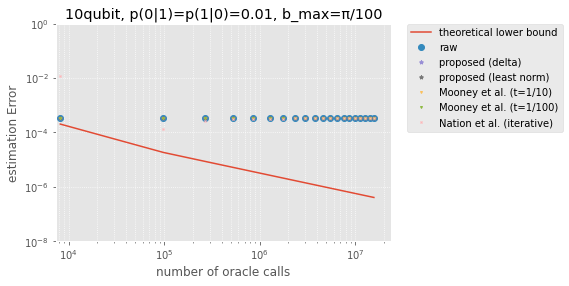

In [24]:
plt.clf()
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0')
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=6)
p_s_lm0 = plt.loglog( OracleCall_list, error_s_lm0_list, '*', color='C2', markersize=4)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, '*', color='C3', markersize=4)
p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C4', markersize=2)
p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C5', markersize=2)
p_nation = plt.loglog( OracleCall_list, error_nation_list, 'x', color='C6', markersize=2)

plt.title("10qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p_theoretical[0], p_raw[0], p_s_lm0[0], p_lnp[0], p_mooney01[0], p_mooney001[0], p_nation[0]), 
           ("theoretical lower bound", "raw", "proposed (delta)", "proposed (least norm)", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "Nation et al. (iterative)"),
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

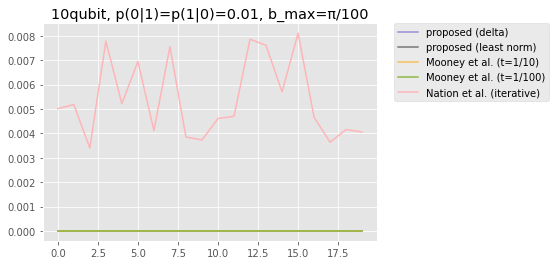

In [32]:
plt.clf()
plt.style.use('ggplot')
# t_theoretical = plt.plot(ErrorCramérRao_list, color='C0')
# t_raw = plt.plot(error_raw_list, color='C1')
t_s_lm0 = plt.plot([s_lm0_time["total"] for s_lm0_time in s_lm0_time_list_list[-1]], color='C2')
t_lnp = plt.plot([lnp_time["total"] for lnp_time in lnp_time_list_list[-1]], color='C3')
t_mooney01 = plt.plot([mooney01_time["total"] for mooney01_time in mooney01_time_list_list[-1]], color='C4')
t_mooney001 = plt.plot([mooney001_time["total"] for mooney001_time in mooney001_time_list_list[-1]], color='C5')
t_nation = plt.plot([nation_time["time"] for nation_time in nation_time_list_list[-1]], color='C6')
plt.title("10qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.legend((t_s_lm0[0], t_lnp[0], t_mooney01[0], t_mooney001[0], t_nation[0]), 
           ("proposed (delta)", "proposed (least norm)", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "Nation et al. (iterative)"),
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)